## PROJECT: Advanced Regression Techniques

Dataset->https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from tqdm import tqdm 
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm  # Add this line to import norm




# EDA


In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis = 1, inplace = True)
print("df size is : {}".format(df.shape))
df.head()

df size is : (2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [101]:
train_ID = train['Id']
test_ID = test['Id']
df= df.drop(["Id"] , axis = 1)

In [102]:
print("files i columnes:", df.shape) # com es el nostre dataset
df.columns

files i columnes: (2919, 79)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [103]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Features
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system

## NaNs

In [104]:
total_nans = df.isna().sum().sum()
print("Total NaNs:", total_nans)
prc_nans= (total_nans/df.size)*100
print(f"% NaNs in dataset: ",prc_nans)

Total NaNs: 13965
% NaNs in dataset:  6.055914761861397


In [105]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


We can see that PoolQC is 99% NaNs, we can eliminate this column. We can do the same with MiscFeature Alley and Fance as more than the 80% are missing values.

### Target Variable 

The target variable is the dependent variable that we want to predict. In this case, it's SalePrice. Let's take a look at it.

A good dependent variable for regression follows a normal distribution, so if the distribution is skewed o with Kurtosis we should manage it in order to have higher accuracies.

### Skewness
Swekness is the degree of distorsion from the symmetrical normal curve.

A symmetrical normal curve has no skewness.

Depending on the sign value of the skew we can determine 2 different groups.

Possitive Skew-> Tail is on the right side of the distribution.

Negative Skew-> Tail is on the left side of the distribution.

In Python, scipy library provides a method named `skew()` to calculate skewness

If we have skewed features or skewed dependent variable, we can get bad acuuracies despite doing a good job, so if we are getting bad results at our models, it can be feature skewness fault.

#### How to correct Skewness.

There are several techniques that corrects Skewness from data. Some of them are:

1. SQRT TRANSFORMATION
   -  The idea behind this technique is to take square root of the variable and then perform linear regression

2.  LOG TRANSFORMATION (most popular)

      - In this case, we have to be careful, because it only works well when the original data is log-Normal Distributed or aprox. In this case, if we implement the log-transformation, we will correct our skewness and get a normal distributed data.

3. BOXCOX-TRANSFORMATION
   -  It's an extension of log transformation where we don't have to worry about zero values  in our dataset.
   - Its more felixible than the others due to a lambda variable.

      - lambda = -1 -> Reciprocal Transformation
      - lambda = -0.5 -> Reciprocal Squared Root
      - lambda  = 0 -> Log Transformation
      - lambda = 0.5 -> SQRT Transformation
      - lambda = 1 -> No transformation
4. EXPONENTIAL TRANSFORMATION
   - Very useful when data follows an exponential transformation

### KURTOSIS

- Kurtosis is about tails distribution not about peackedness

- Usage -> It describes extrem values in one vs the other tail. Is a measure for outliers


Different Types of Kurtosis:

     High Kurtosis -> Heavy tails or outliers

      Low Kurtosis -> Light tails or no outliers

     Mesokurtic ->  No clear distinction between heavy and light tails

How to differenciate them:

     LeptoKurtic (Kurtosis > 3) 

        . Distribution -> Longer

        . Peak -> higher slope

        . Tails -> fatter

     PlatyKurtic (Kurtosis < 3)

        . Distribution -> Shorter

        . Peak -> Lowe slope
        
        . Tails -> Thinner


TARGET VARIABLE HISTOGRAM

c:\Users\manel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

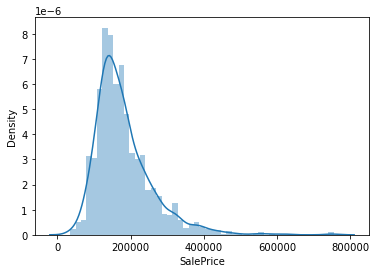

In [106]:
sns.distplot(train['SalePrice'])

As we can see, out target variable does not follow a normal distribution.

We can also say that is positively skewed and that it has a kurtosis > 3 so  a LeptoKurtic.

Let's calculate it

In [107]:
skewness = skew(train['SalePrice'])
kurt = kurtosis(train['SalePrice'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


Our previous observations were correct.

Out target variable is positively Skewed and a high Kurtosis

We can define a function to fix the skewness. 

As out df dataset does not have SalesPrice column, it will be managed after dealing with missing values

In [108]:
def fixing_skewness(df):
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
fixing_skewness(train)
y_train = np.log(y_train)

c:\Users\manel\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
c:\Users\manel\anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [109]:
skew(y_train) #our target variable is now less skewed

0.1212103673013655

### Homoscedasticity or Hetereoscedasticity
Now lets look how our target variable relates with the other ones and  see the skatter of it

Our objective is to know if we have Heteriscedasticity or Homoscedasicity.

Homoscerasticity -> Is when the variance residual un a regression model is constant

In [110]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot:xlabel='OverallQual', ylabel='GarageArea'>

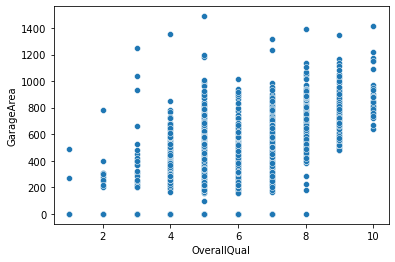

In [111]:
sns.scatterplot(x='OverallQual', y='GarageArea', data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='TotalBsmtSF'>

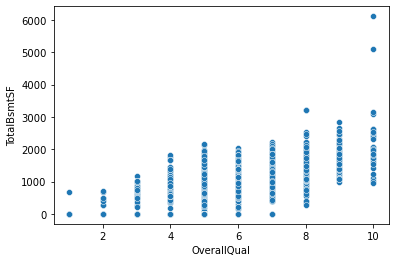

In [112]:
sns.scatterplot(x='OverallQual', y='TotalBsmtSF', data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='2ndFlrSF'>

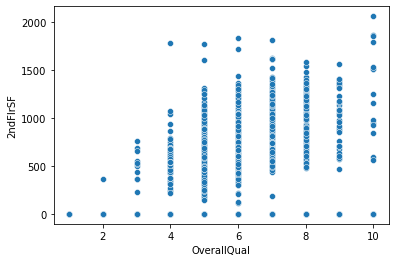

In [113]:
sns.scatterplot(x='OverallQual', y='2ndFlrSF', data=df)

We have heteroscedasticiy

### Multicollinearlity

Multicollinearility is an other thing that we have to take care of.

We have Multicollinearility when whe have strong correlations between independent variables.

It can lead to unstable estimates and inflated standard errors, making it hard for the regression.

We will take a look later

# Feature Engineering

In [114]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


1- Missing Values

In [115]:
df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('Fence', axis=1)

df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

df = df.drop(['Utilities'], axis=1)
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

Check again missing values

In [116]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


2- Transform some numeric features into categorical

    (Years, Months, zones ...)

In [117]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [118]:
from sklearn.preprocessing import LabelEncoder
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))    
print('Shape df: {}'.format(df.shape))

Categorical Features: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Shape df: (2919, 74)


## We can create new features with addition

In [119]:
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                

## Checking Outliers z-score Method

In [120]:
threshold = 3
no_outliers = df[(np.abs(df - df.mean() / df.std()) <= threshold).any(axis = 1)]
dataset = no_outliers
dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_sqr_footage
0,10,3,65.0,8450,1,3,3,4,0,5,...,0,0,0,0,4,2,8,4,2566.0,2416.0
1,5,3,80.0,9600,1,3,3,2,0,24,...,0,0,0,0,7,1,8,4,2524.0,2240.0
2,10,3,68.0,11250,1,0,3,4,0,5,...,0,0,0,0,11,2,8,4,2706.0,2272.0
3,11,3,60.0,9550,1,0,3,0,0,6,...,0,0,0,0,4,0,8,0,2473.0,1933.0
4,10,3,84.0,14260,1,0,3,2,0,15,...,0,0,0,0,3,2,8,4,3343.0,2853.0


### Dummy Variables

In [121]:
df = pd.get_dummies(df)
# print(df.shape)

## Fixing Skewness

In [122]:
fixing_skewness(df)


c:\Users\manel\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
c:\Users\manel\anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


## DATA MODELING AND SUBMISSION

In [123]:
train = df[:ntrain]
test = df[ntrain:]

X_train , X_test , y_train , y_test = train_test_split(train , y_train , test_size = 0.2 , random_state = 1)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test) , columns = test.columns)

In [124]:
Lr = LinearRegression()# default parameters
Lr.fit(X_train , y_train)
scores = cross_val_score(Lr, X_train, y_train, cv=10)
scores.mean()


0.8757374935752799

In [125]:
predict =Lr.predict(test)
print(predict)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict
sub.to_csv('lr_submission.csv', index=False)

[-1.97282642e+55 -1.92035099e+55 -2.71774138e+55 ... -1.95518615e+55
  5.78952127e+50 -2.62346189e+55]


          Feature  Importance
4          Street    0.000003
42   LowQualFinSF    0.000083
66      3SsnPorch    0.000099
11     Condition2    0.000106
69        MiscVal    0.000156
32   BsmtFinType2    0.000165
45   BsmtHalfBath    0.000197
68       PoolArea    0.000225
36        Heating    0.000322
19       RoofMatl    0.000367
33     BsmtFinSF2    0.000368
39     Electrical    0.000432
44   BsmtFullBath    0.000441
8       LandSlope    0.000489
60     GarageQual    0.000493
61     GarageCond    0.000543
26     Foundation    0.000543
7       LotConfig    0.000611
72       SaleType    0.000684
18      RoofStyle    0.000712
67    ScreenPorch    0.000715
28       BsmtCond    0.000736
65  EnclosedPorch    0.000740
12       BldgType    0.000796
47       HalfBath    0.000829
22     MasVnrType    0.000858
62     PavedDrive    0.000916
37      HeatingQC    0.000936
54    FireplaceQu    0.000970
10     Condition1    0.001014


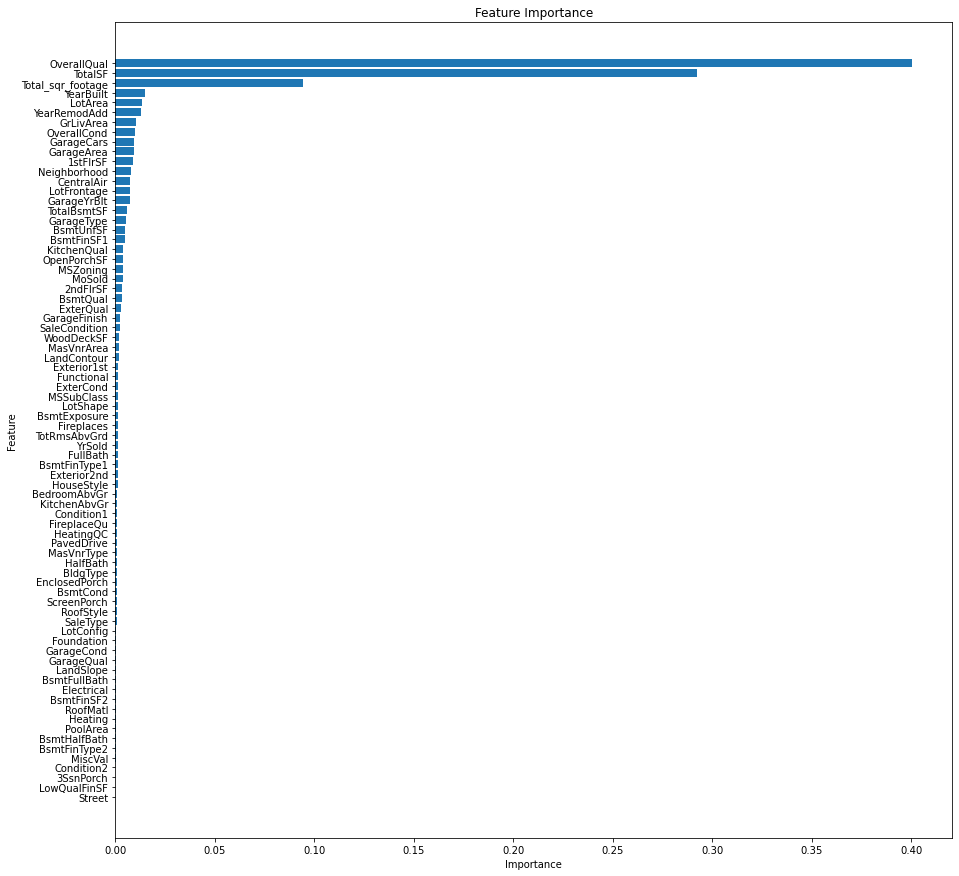

In [126]:
import matplotlib.pyplot as plt

# Create a RandomForestRegressor model (you can also use DecisionTreeRegressor for a single tree)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=True)
print(importances_df.head(30))

# Plot the feature importances
plt.figure(figsize=(15, 15))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()

In [127]:
X_train = X_train.drop(["Street","Condition2","BsmtFinType2","BsmtHalfBath","Heating","RoofStyle","GarageQual","LandSlope","GarageCond","Electrical","LotConfig"], axis = 1)
X_test = X_test.drop(["Street","Condition2","BsmtFinType2","BsmtHalfBath","Heating","RoofStyle","GarageQual","LandSlope","GarageCond","Electrical","LotConfig"], axis = 1)
test = test.drop(["Street","Condition2","BsmtFinType2","BsmtHalfBath","Heating","RoofStyle","GarageQual","LandSlope","GarageCond","Electrical","LotConfig"], axis = 1)

In [128]:
SV = svm.SVR()# default parameters
SV.fit(X_train , y_train)
predict =SV.predict(test)
print(predict)
scores = cross_val_score(SV, X_train, y_train, cv=10)
predict=np.exp(predict)
print(predict)
scores.mean()


sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict

# Save the DataFrame to a CSV file
sub.to_csv('SV_submission.csv', index=False)

[11.95878759 11.95878759 11.95878759 ... 11.95878759 11.95878759
 11.95878759]
[156183.6113521 156183.6113521 156183.6113521 ... 156183.6113521
 156183.6113521 156183.6113521]
